# Case: Classifying student knowledge level with Machine Learning

#### This problem will be approached with numpy, pandas, scikit-learn and matplotlib, all open source python libs. Data will be pre-processed and pre-analyzed to reach insights. Different methods will be tested for feature selection, measuring correlation between the available variables. Some ML methods will be tested using cross validation to determine each test in more adequate do better model the training set, taking in consideration the possibility of overfitting. The chosen method will be further refined, with some hyperparameters tweaking. 

#### Lastly, all gathered information will be used to make predictions on a test set.

#### The case presents one prediction based on a classification.

#### Case developed by me, Lucas Garcia. I don't really have a personal page which I'm proud of... lucas-garcia on linkedin, coqueiro on GitHub.

What's Machine Learning?
**Machine Learning** tries to replicate learning processes within models. Here's a [visual introduction to Machine Learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).

Imagine a curious kid who sticks his palm over a candle flame and pulls back in a brief moment of sharp pain.
The next day, he comes across a hot stove top, seeing the red color and feeling the heat waves pulsing from it like the candle from the day before.
The kid has never touched a stove top, but fortunately, he has learned from previous data to avoid red things that pulse heat.

A ML algorithm learns from inputs, and each model deals differently with them, with different fitting processes and mathematical approaches. We can see how variables can change model output with this [lego price vs number of pieces regression](https://docs.google.com/spreadsheets/d/1VLg-WiTDZ6vwBo0pm22OOElz7XW1dJz3WSRI0sPlTvU/edit?usp=sharing).

When talking about different ML modelling, there is one big concern: the **bias-variance tradeoff**.
Basically:

- Error due to Bias is the difference between what our model says and what reality says. High bias methods are usually simple, like a linear regression, which don't tend to overfit our data, but may underfit it, failing to capture important regularities (high bias toward reality). 

Imagine that a kid that learned that all red things causes sharp pain. This kid will certainly not touch red hot stuff, so he won't touch lava, but he will not touch red crayon since it's red.

- Error due to Variance is basically the difference between predictions from different data sets. High variance methods are usually dense and complicated, like a neural network, which tend to overfit if not cautious, failing to capture real model.

Imagine that the kid learned that all red things that pulse heat causes sharp pain. This kid will play normally with red crayon, since he knows that it doesn't pulse heat, but he will touch a not so hot stove top, which pulses heat but is not red.

A good model would, for example, prioritize investigating if things pulse heat as a more prominent observation. We should note that both kids (we can call them ML models by now) had a small dataset, which lessened their chances of reaching a model that have a closer match to reality.

Our [dataset](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling) comes from Gazi University, in Ankara, Turkey, specifically from undergraduate students of Department of Electrical Education of Gazi University in the 2009 semester. We are using four input variables for this case, which are:

- STG (The degree of study time for goal object materails);
- SCG (The degree of repetition number of user for goal object materails);
- STR (The degree of study time of user for related objects with goal object);
- LPR (The exam performance of user for related objects with goal object);
- PEG (The exam performance of user for goal objects).

Our output variable is:

- UNS (The knowledge level of user).

UNS has four different values: Very Low, Low, Middle and High. Those values were attributed to the students by the authors of this dataset.

Also, we are using a reduced number of values for training because data is very correlated. In this way we can give a kind of rough start to our algorithms (hopefully).

In [1]:
import numpy as np
import pandas as pd

tsv_file = open('knowledge_info.tsv','r')
sample = pd.read_csv(
    tsv_file,
    header = 'infer',
    delimiter='\t',
    decimal=','
)
tsv_file.close()

print('Quantity of lines:\n', len(sample))

Quantity of lines:
 258


We are splitting our dataset in a train and test sample to test our modelling in the end. In this case we are able to simply use the pandas' Dataframe, but sometimes we may need to restructure our data, for example if we have categorical input variables and want to create a regression. A good lib for this one is [**patsy**](https://patsy.readthedocs.io/en/latest/). 

In [2]:
from sklearn.model_selection import train_test_split

header = sample.columns.values
names = header[:][:-1]
y_name = header[1:][-1]

X = sample[names]

y = np.copy(sample[y_name])
y[y=='High'] = 3
y[y=='Middle'] = 2
y[y=='Low'] = 1
y[y=='very_low'] = 0

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [4]:
from sklearn.model_selection import train_test_split

header = sample.columns.values
names = header[:][:-1]
y_name = header[1:][-1]

X = sample[names]

y = np.copy(sample[y_name])
y[y=='High'] = 3
y[y=='Middle'] = 2
y[y=='Low'] = 1
y[y=='very_low'] = 0

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

Now we are going to take a look at our training dataset. We are going to look for behavior in each output class (looking for mean values, which may move us toward high bias methods, and also deviation, which may move us toward high variance methods.

In [5]:
X_y = X.copy()
X_y[y_name] = y
groupby_X_y = X_y.groupby(y_name)
table = pd.concat([groupby_X_y.agg(['mean', 'std']),
                  pd.DataFrame(groupby_X_y.size(),columns=['counts'])],
                  axis=1)
table

,"(STG, mean)","(STG, std)","(SCG, mean)","(SCG, std)","(STR, mean)","(STR, std)","(LPR, mean)","(LPR, std)","(PEG, mean)","(PEG, std)",counts
UNS,,,,,,,,,,,
0,0.301067,0.220553,0.186333,0.109585,0.376000,0.244826,0.317333,0.200801,0.090000,0.055549,15
1,0.317985,0.170890,0.347742,0.202265,0.438333,0.250940,0.506212,0.229265,0.232318,0.075402,66
2,0.394764,0.214900,0.356639,0.214160,0.502639,0.233123,0.342778,0.231974,0.544028,0.129448,72
3,0.427660,0.241866,0.432755,0.243463,0.509717,0.253340,0.525472,0.291617,0.763774,0.114425,53


We can note that if we were to randomly guess outputs for each entry, our best bet would be to guess that it is UNS 2, since it has the most counts. With this bet, our accuracy would be 72/(15+66+72+53) = 34.95% (0.35). Note: a usually better way to validate modelling is to use **AUROC** instead of accuracy. **AUROC** is calculated using false positives and true positives, and doesn't rely on comparisons between best betting accuracy and actual accuracy. [Here's a nice youtube video from Data School about ROC and AUROC](https://www.youtube.com/watch?v=OAl6eAyP-yo).

It's important to note that we have just a few examples of UNS 0 entries. This is very notable in **skewed data**, data that have a long tail. UNS 0 will be a less probable prediction if its data doesn't have a clear difference from the other classes, which would move our model towards UNS 1, 2 and 3. This kind of observation is important and may impact the whole process. [Here's a link with some nice explanation](https://www.mathsisfun.com/data/skewness.html).

We can perceive that PEG has a increasing mean and relative low deviation compared to other variables. LPR looks similar in that sense, but with a higher relative deviation.

Now, some feature selection methods are going to be tested to understand correlations between input variables and output variable. Some of the code below was based on [Ando Saabas's blog](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/), just to better showcase the results with proper formatting. Ando Saabas's post is also very informative into feature selection with lots of different ML algorithms.

3-fold cross-validation will be used as a stronger way to check nice ML algorithm fitting, dividing training set into training and testing partitions and averaging score results to verify how well each method performs.

All methods tested provide a nice feature importance feature, which will help us to choose features.

The Logistic Regressor is considered a high bias classifier algorithm, and the Gradient Boosting Classifier is considered to be a high variance classifier algorithm, although it can very robust to overfitting when used properly. Also, Logistic Regressors perform better with scaled inputs.

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ranks = {}
scores = {}

def rank_to_dict(ranks, names):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
y = np.asarray(y, dtype="S1")

lr = LogisticRegression(random_state=42)
lr.fit(X_scaled, y)
ranks['LR'] = rank_to_dict(np.abs(np.ravel(lr.coef_)), names)
scores['LR'] = round(np.mean(cross_val_score(lr, X_scaled, y, scoring='accuracy')), 3) 
#AUROC may be a better way to analyze precision of a method

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_scaled, y)
ranks['GB'] = rank_to_dict(gb.feature_importances_, names)
scores['GB'] = round(np.mean(cross_val_score(gb, X_scaled, y, scoring='accuracy')), 3)

r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name]
                             for method in ranks.keys()]), 3)

methods = sorted(ranks.keys())

print('%20s\t%14s' % ('', '\t'.join(methods)))
for name in names:
    print('%20s\t%14s' % (name, '\t'.join(map(str,
                         [ranks[method][name] for method in methods]))))

print('%20s\t%14s' % ('Score', '\t'.join(map(str,
                         [scores[method] for method in methods]))))

                    	         GB	LR
                 STG	      0.0	0.02
                 SCG	     0.06	0.15
                 STR	     0.17	0.04
                 LPR	     0.68	0.22
                 PEG	      1.0	0.55
               Score	   0.908	0.796


We can see that the Gradient Boosting Classifier seems to win, at first.

Note: [**auto-sklearn**](https://automl.github.io/auto-sklearn/stable/) is a lib that abstracts algorithm and hyperparameter (algorithm's parameters) selection. It will not be used in this case for it's purpose is educational.

In [6]:
refine_scores = {}
refine_methods = ['GB', 'LR']
selected_features = ['LPR', 'PEG']

X_GB = X[selected_features]

gb = GradientBoostingClassifier(random_state=42)
refine_scores['GB'] = round(np.mean(cross_val_score(gb, X_GB, y, scoring='accuracy')), 3)

X_LR = X[selected_features]
scaler = StandardScaler()
scaler.fit(X_LR)
X_LR_scaled = scaler.transform(X_LR)

lr = LogisticRegression(random_state=42)
refine_scores['LR'] = round(np.mean(cross_val_score(lr, X_LR_scaled, y, scoring='accuracy')), 3)

print('%20s\t%14s' % ('', '\t'.join(refine_methods)))
print('%20s\t%14s' % ('Score', '\t'.join(map(str,
                         [refine_scores[method] for method in refine_methods]))))

                    	         GB	LR
               Score	    0.951	0.83


Now we are going to plot our input variables in a graph to see how they are distributed. It will be easier with only two features, which can be displayed in a 2D graph (no worries, if needed this process can be done in a multivariate scenarios). Clear visual explorations usually bring insights much quicker than testing different parameters and checking prediction results, also giving fast comprehension about our dataset.

Our goal is to trim some polluting data, which may increase variance error in our model (see polynomial example in spreadsheet). This bad data is usually called an **outlier**.

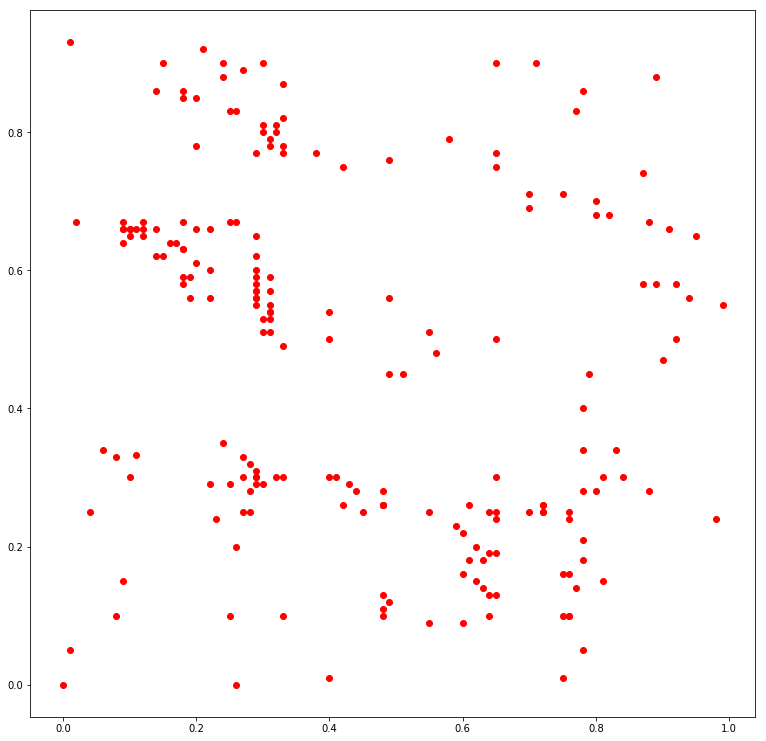

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

x_axis = X_y[selected_features[0]]
y_axis = X_y[selected_features[1]]

plt.figure(figsize=(13, 13))
plt.plot(x_axis, y_axis, 'ro')
plt.show()

We have a rather sparse plotting, it may help to see how variables are distributed within each output class. This will help us to find outliers to optimize our training dataset, reducing variance error. We are going to use Isolation Forests to locate outliers.

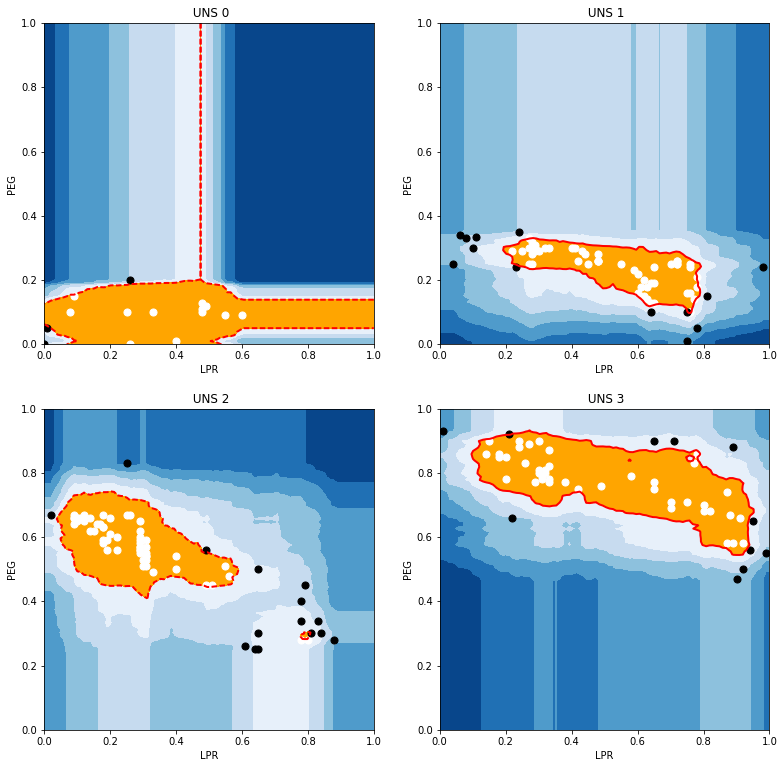

In [8]:
from sklearn.ensemble import IsolationForest
from scipy import stats

xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
outliers_fraction = 0.2

X_y_clean = pd.DataFrame(data=None, columns=[selected_features + [y_name]])

plt.figure(figsize=(13, 13))
for i in range(4):
    subplot = plt.subplot(2, 2, i + 1)
    
    X_y_i = X_y.loc[X_y[y_name] == i][selected_features + [y_name]]
    X_i = X_y_i[selected_features].as_matrix()
    
    n_outliers = int(outliers_fraction * len(X_i))
    isf = IsolationForest(contamination=outliers_fraction, random_state=42)
    isf.fit(X_i)

    scores_pred = isf.decision_function(X_i)
    threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)
    y_pred = isf.predict(X_i)
    Z = isf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    X_inside = []
    X_outside = []
    
    X_y_i = X_y_i.reset_index(drop=True)
    for dot in range(int(len(X_i))):
        if scores_pred[dot] >= threshold:
            X_inside = X_inside + [X_i[dot]]
            X_y_clean = X_y_clean.append(X_y_i.loc[dot])
        else:
            X_outside = X_outside + [X_i[dot]]

    X_inside = np.array(X_inside)
    X_outside = np.array(X_outside)

    subplot.contourf(xx, yy, Z, levels=np.sort(np.linspace(Z.min(), threshold, 7)), cmap=plt.cm.Blues_r)
    red_line = subplot.contour(xx, yy, Z, levels=np.sort([threshold]), linewidths=2, colors='red')
    orange_area = subplot.contourf(xx, yy, Z, levels=np.sort([threshold, Z.max()]),colors='orange')
    white_inside = subplot.scatter(X_inside[:, 0], X_inside[:, 1], 50, c='white', edgecolors='face')
    black_outside = subplot.scatter(X_outside[:, 0], X_outside[:, 1], 50, c='black')
    
    subplot.set_title("%s %d" % (y_name, i))
    subplot.set_xlim((0, 1))
    subplot.set_ylim((0, 1))
    subplot.set_xlabel(selected_features[0])
    subplot.set_ylabel(selected_features[1])

X_y_clean = X_y_clean.reset_index(drop=True)
plt.show()

We can notice some things while investigating our plots. We can see how PEG clearly influences student knowledge and although LPR alone doesn't mean a lot (we can see in some cases that data is very horizontally distributed), our models noticed its importance. Some questions here can be interesting:
- There's some data close to the borders, should we consider them and be less restrict?
- In UNS 2 we have an isle to the right full of outlier dots. Can this be a real cluster? Should we decrease outline fraction for this class?
- UNS 0 has just a few points. Should we draw aggressive conclusions here? Are these points distant enough from UNS 1?

For now we won't use cleaned data, just to prove the concept at the end of this case.

Now we are going to do some hyperparameter tuning with GridSearchCV, a nice sklearn utility for model selection.

GradientBoostingClassifier will be explored. It's possible to test feature quantity and all parameters using sklearn's Pipeline, for example, but proccessing would take a long time. For this reason, only a few parameters are going to be tested in this next step, and only a few at a time, just to prove the concept.

In [9]:
from sklearn.model_selection import GridSearchCV

max_features_list = ['sqrt', 'auto', 'log2']
subsample_list = 0.1 * np.arange(3,6)
max_depth_list = 1 * np.arange(4,7)

tuned_parameters = [{'max_features': max_features_list, 
                     'subsample': subsample_list,
                     'max_depth': max_depth_list}]

gb = GradientBoostingClassifier(random_state=42)

gridSearch = GridSearchCV(gb, tuned_parameters, cv=3, scoring='accuracy')
gridSearch.fit(X_GB, y)

print('Best parameters:\n', gridSearch.best_params_)
print('Best score:\n', gridSearch.best_score_)

Best parameters:
 {'subsample': 0.40000000000000002, 'max_features': 'sqrt', 'max_depth': 5}
Best score:
 0.961165048544


In [10]:
from sklearn.model_selection import GridSearchCV

learning_rate_list = 0.01 * np.arange(7,10)
n_estimators_list = 20 * np.arange(11,14)

tuned_parameters = [{'learning_rate': learning_rate_list, 
                     'n_estimators':n_estimators_list}]

gb = GradientBoostingClassifier(random_state=42, max_features="sqrt", subsample=0.4, max_depth=5)

gridSearch = GridSearchCV(gb, tuned_parameters, cv=3, scoring='accuracy')#, verbose=2)
gridSearch.fit(X_GB, y)

print('Best parameters:\n', gridSearch.best_params_)
print('Best score:\n', gridSearch.best_score_)

Best parameters:
 {'learning_rate': 0.080000000000000002, 'n_estimators': 240}
Best score:
 0.966019417476


Remembering, our model went from 0.796 (using LR), to 0.908, then 0.951 and now 0.966 using cross validation. We've done model selection, feature selection and hyperparameter selection. Now let's test our setup against the test set.

In [11]:
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(random_state=42, max_features="sqrt", subsample=0.4, max_depth=5,
                               learning_rate=0.08, n_estimators=240)

gb.fit(X_GB, y)

X_GB_test = X_test[selected_features]

y_predicted = gb.predict(X_GB_test)
y_test = np.asarray(y_test, dtype="S1")

print(y_test)
print(y_predicted)

prediction_score = round(accuracy_score(y_test, y_predicted), 3)
print('\n','Prediction score:',prediction_score)

[b'2' b'3' b'0' b'1' b'3' b'1' b'0' b'2' b'1' b'1' b'1' b'1' b'1' b'2' b'2'
 b'0' b'0' b'1' b'1' b'2' b'1' b'1' b'1' b'0' b'2' b'3' b'1' b'3' b'2' b'1'
 b'2' b'2' b'0' b'3' b'2' b'2' b'2' b'2' b'3' b'1' b'1' b'2' b'0' b'2' b'0'
 b'3' b'1' b'3' b'3' b'3' b'0' b'2']
[b'2' b'3' b'1' b'1' b'3' b'1' b'0' b'2' b'1' b'1' b'1' b'1' b'1' b'2' b'2'
 b'0' b'1' b'1' b'1' b'2' b'1' b'1' b'1' b'1' b'2' b'3' b'1' b'3' b'2' b'1'
 b'2' b'2' b'0' b'3' b'2' b'1' b'2' b'2' b'3' b'1' b'1' b'2' b'0' b'2' b'0'
 b'3' b'1' b'3' b'3' b'3' b'0' b'2']

 Prediction score: 0.923


We got prediction score 0.923! Of course, it's lower than our score during training, but that's only natural and will happen in most cases. Now we are going to test our clean train dataset with the same model.

In [14]:
gb.fit(X_y_clean[selected_features], X_y_clean[y_name])

y_predicted = np.asarray(gb.predict(X_GB_test), dtype="S1")
y_test = np.asarray(y_test, dtype="S1")

print(y_test)
print(y_predicted)

prediction_score = round(accuracy_score(y_test, y_predicted), 3)
print('\n','Prediction score:',prediction_score)

[b'2' b'3' b'0' b'1' b'3' b'1' b'0' b'2' b'1' b'1' b'1' b'1' b'1' b'2' b'2'
 b'0' b'0' b'1' b'1' b'2' b'1' b'1' b'1' b'0' b'2' b'3' b'1' b'3' b'2' b'1'
 b'2' b'2' b'0' b'3' b'2' b'2' b'2' b'2' b'3' b'1' b'1' b'2' b'0' b'2' b'0'
 b'3' b'1' b'3' b'3' b'3' b'0' b'2']
[b'2' b'3' b'1' b'1' b'3' b'1' b'0' b'2' b'1' b'1' b'1' b'1' b'1' b'2' b'2'
 b'0' b'0' b'1' b'1' b'2' b'1' b'1' b'1' b'0' b'2' b'3' b'1' b'3' b'2' b'1'
 b'2' b'2' b'0' b'3' b'2' b'3' b'2' b'2' b'3' b'1' b'1' b'2' b'0' b'2' b'0'
 b'3' b'1' b'3' b'3' b'3' b'0' b'2']

 Prediction score: 0.962


We got an amazing result! With proper hyperparemeter selection (using this data), we could maybe obtain even higher scores, but this proves that cleaning data is very important. [Here's a good point to start studying ML](https://github.com/hangtwenty/dive-into-machine-learning), and [here's a repo full of datasets waiting to be used](https://github.com/hangtwenty/dive-into-machine-learning). This universe is very vast and full of letters, math and logical thinking. Take your time when learning this stuff, let it sit.

That is the end of the case, I hope that it helped you, showing some thoughts on very important ML modelling steps!